In [3]:
require('ggplot2') || install.packages('ggplot2', dependencies = TRUE)
require('BiocManager') || install.packages('BiocManager', dependencies = TRUE)
require('ggtree') || BiocManager::install('ggtree')

In [6]:
tree <- read.tree("output.newick")

In [23]:
tree


Phylogenetic tree with 52379 tips and 52378 internal nodes.

Tip labels:
  MN948772, MH307034, CY257877, CY225078, CY214610, CY213058, ...

Rooted; includes branch lengths.

In [51]:
require('ape')
hc <- hclust(dist(mtcars))
hc <- ape::as.phylo(hc)
hc


Phylogenetic tree with 32 tips and 31 internal nodes.

Tip labels:
  Mazda RX4, Mazda RX4 Wag, Datsun 710, Hornet 4 Drive, Hornet Sportabout, Valiant, ...

Rooted; includes branch lengths.

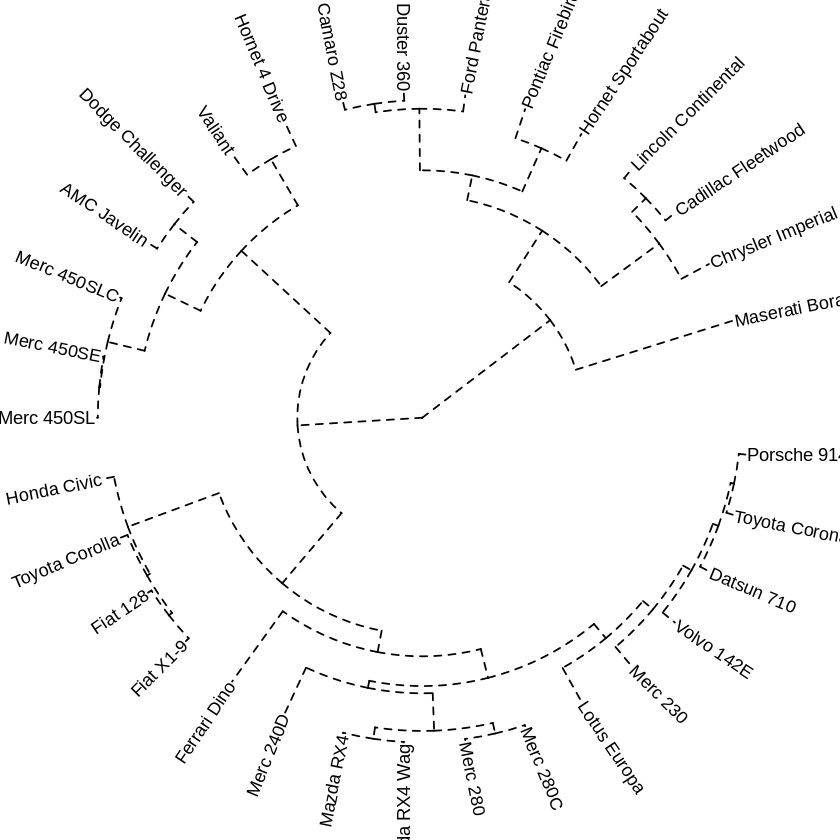

In [54]:
p <- ggtree(hc, linetype='dashed', layout="circular") + geom_tiplab()
plot(p)

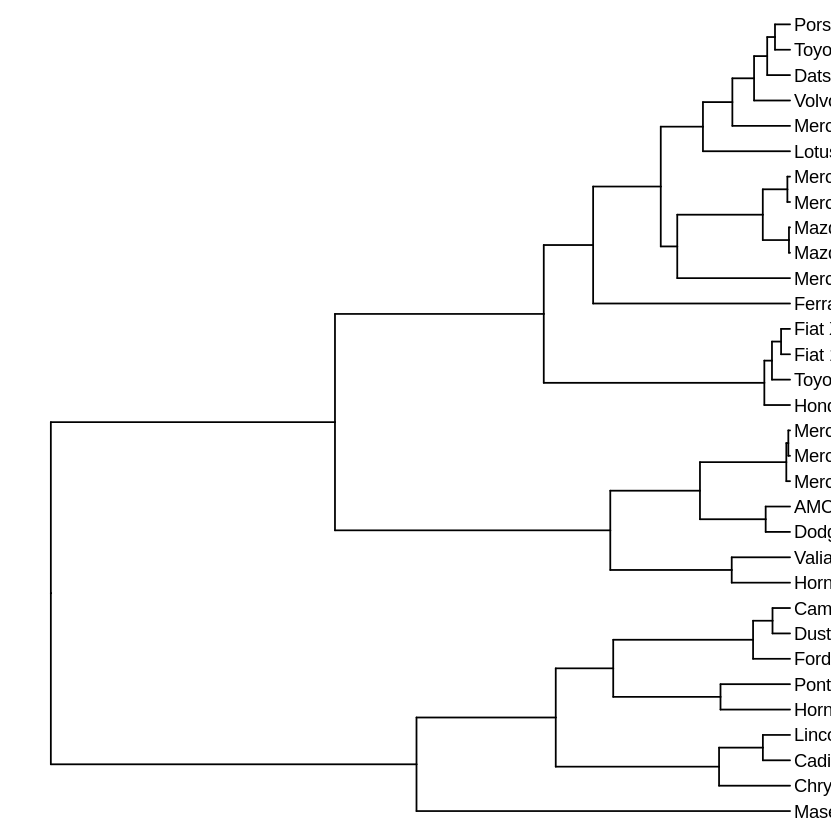

In [55]:
p <- ggtree(hc) + geom_tiplab()
plot(p)

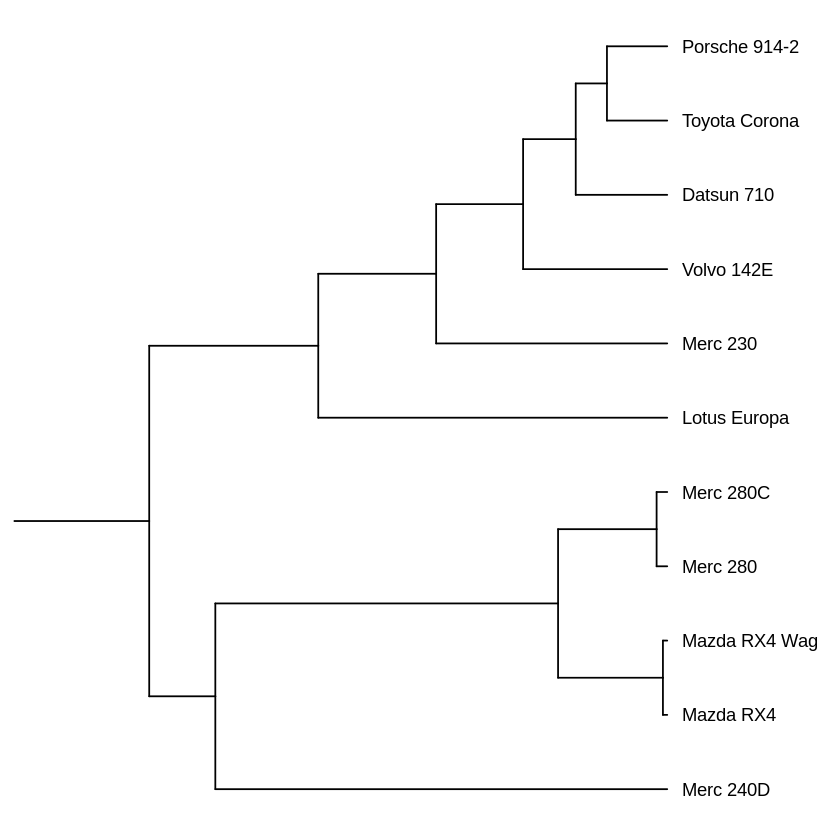

In [57]:
viewClade(p, MRCA(p, c("Merc 230", "Merc 280C")))